In [44]:
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
# %config InlineBackend.figure_formats = ['svg']
%matplotlib inline

plt.rcParams['figure.figsize'] = (9, 6)
sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [5]:
base_df = pd.read_csv("../Data/clinvar_conflicting.csv", dtype={"CHROM": "string", "MOTIF_NAME": "string", "HIGH_INF_POS": "string"})

In [9]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHROM               65188 non-null  string 
 1   POS                 65188 non-null  int64  
 2   REF                 65188 non-null  object 
 3   ALT                 65188 non-null  object 
 4   AF_ESP              65188 non-null  float64
 5   AF_EXAC             65188 non-null  float64
 6   AF_TGP              65188 non-null  float64
 7   CLNDISDB            65188 non-null  object 
 8   CLNDISDBINCL        167 non-null    object 
 9   CLNDN               65188 non-null  object 
 10  CLNDNINCL           167 non-null    object 
 11  CLNHGVS             65188 non-null  object 
 12  CLNSIGINCL          167 non-null    object 
 13  CLNVC               65188 non-null  object 
 14  CLNVI               27659 non-null  object 
 15  MC                  64342 non-null  object 
 16  ORIG

In [51]:
# reduce the data frame and do some basic cleaning, start with just a few bare features

#     - CHROM, REF, ALT, AF_*, CLNVC, ORIGIN, CLASS, Allele, Consequence, IMPACT, STRAND
reduced_df = base_df[['CHROM', 'REF', 'CLASS']]
reduced_df[reduced_df['CHROM'] == 'X'] = '23'
reduced_df[reduced_df['CHROM'] == 'MT'] = '24'
# reduced_df['CHROM'].unique()
# reduced_df.astype({'CHROM': 'int64'})
# reduced_df['CHROM'].unique()
reduced_df["CHROM"] = pd.to_numeric(reduced_df["CHROM"])

# dropping MT rows (after it was converted to 24)
reduced_df.drop(reduced_df[reduced_df['CHROM'] == 24].index, inplace=True)

# drop rows where REF is not one of the main 4 (for others there are not many rows, could maybe combine them though in the future somehow)
main_alleles = ['C', 'G', 'A', 'T']
reduced_df = reduced_df[reduced_df['REF'].isin(main_alleles)]

print(reduced_df['REF'].nunique())
with pd.option_context('display.max_rows', 2000):
    print(reduced_df['REF'].value_counts())

print(reduced_df['CLASS'].value_counts())

<ipython-input-51-21dbd2f1030f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df[reduced_df['CHROM'] == 'X'] = '23'
/Users/NickPC/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
<ipython-input-51-21dbd2f1030f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

4
C    21158
G    20678
A     9616
T     9138
Name: REF, dtype: int64
0    45162
1    15428
Name: CLASS, dtype: int64


In [50]:
# need to do one-hot-encoding of allele type to turn it into a useful variable
# or can maybe use Pandas built in functions, Pandas.Categorical...

reduced_df.loc[:, 'REF'] = reduced_df['REF'].astype('category')

print(reduced_df['REF'].nunique())
print(reduced_df['REF'].value_counts())

4
C    21158
G    20678
A     9616
T     9138
Name: REF, dtype: int64


In [48]:
df_train, df_test = train_test_split(reduced_df, test_size=0.2, random_state=42)

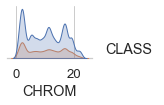

In [49]:
sns.pairplot(df_train, corner=True, height=1.5, plot_kws={'size': 3}, hue='CLASS');